In [1]:
import keras
# Cargar el conjunto de datos
mnist = keras.datasets.mnist
# Cargar la división de entrenamiento y prueba del conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


label: 2
image: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  83  91 143 255 190  91  50   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   9  49 180 246 253 253 253 253 253 220 154  17   3   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  46 107 178 253 253 253 253 253 253 253 253 253 253 253 126  45   0   0   0   0   0]
 [  0   0   0   0   0   0   0 107 253 253 253 253 223 220 220 220 220 245 253 253 253 253 106   0   0   0   0   0]
 [  0   0   0   0   0   0   0 107 173 253 229 129  12   0   0 

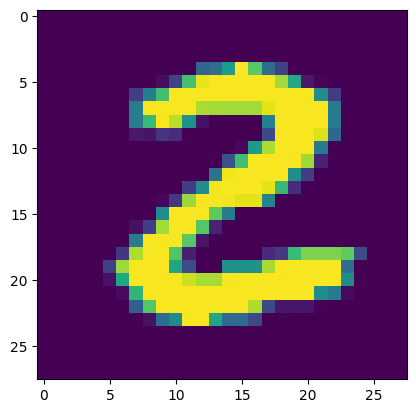

In [2]:
# Visualización de una muestra
import numpy as np
import matplotlib.pyplot as plt
# se puede poner un valor entre 0 y 59999
index = 25
# Imprime la etiqueta y laimagen
np.set_printoptions(linewidth=320)
print(f'label: {train_labels[index]}')
print(f'image: \n {train_images[index]}')
# Visualiza la imagen
plt.imshow(train_images[index])

In [3]:
# Normalizar los valores de píxeles del tren y probar las imágenes
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
# Construir el modelo de clasificación
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [5]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2544 - accuracy: 0.9292 - val_loss: 0.1360 - val_accuracy: 0.9586
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1133 - accuracy: 0.9671 - val_loss: 0.1020 - val_accuracy: 0.9687
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0787 - accuracy: 0.9766 - val_loss: 0.0903 - val_accuracy: 0.9725
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0592 - accuracy: 0.9821 - val_loss: 0.0875 - val_accuracy: 0.9725
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0465 - accuracy: 0.9858 - val_loss: 0.0851 - val_accuracy: 0.9742
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0371 - accuracy: 0.9879 - val_loss: 0.0821 - val_accuracy: 0.9763
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0287 - accuracy: 0.9913 - val_loss: 0.0751 - val_accurac

<Axes: >

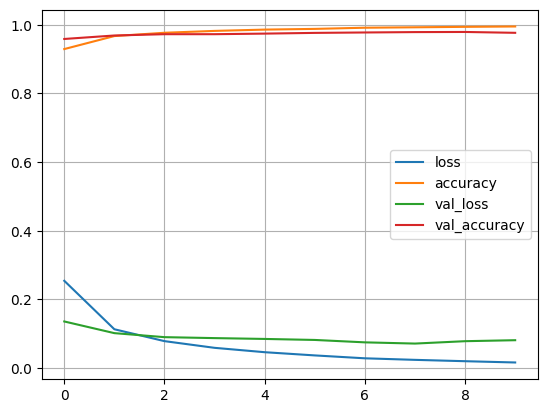

In [7]:
# Graficar el historial de entrenamiento:
import pandas as pd
pd.DataFrame(history.history).plot(grid=True)

In [8]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(train_images, train_labels)
print(f'loss: {loss}')
print(f'accuracy: {accuracy}')
#

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0125 - accuracy: 0.9965
loss: 0.012454432435333729
accuracy: 0.9964666962623596
